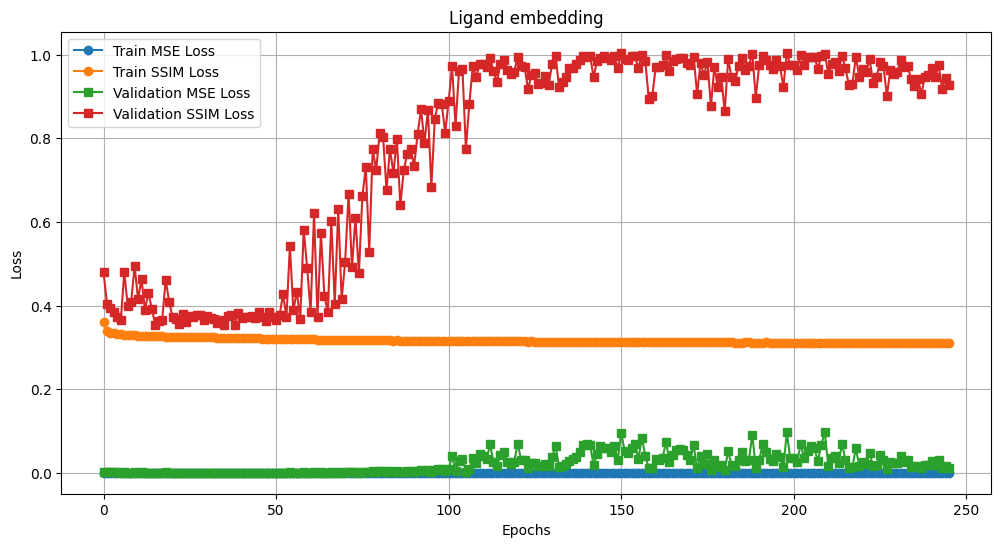

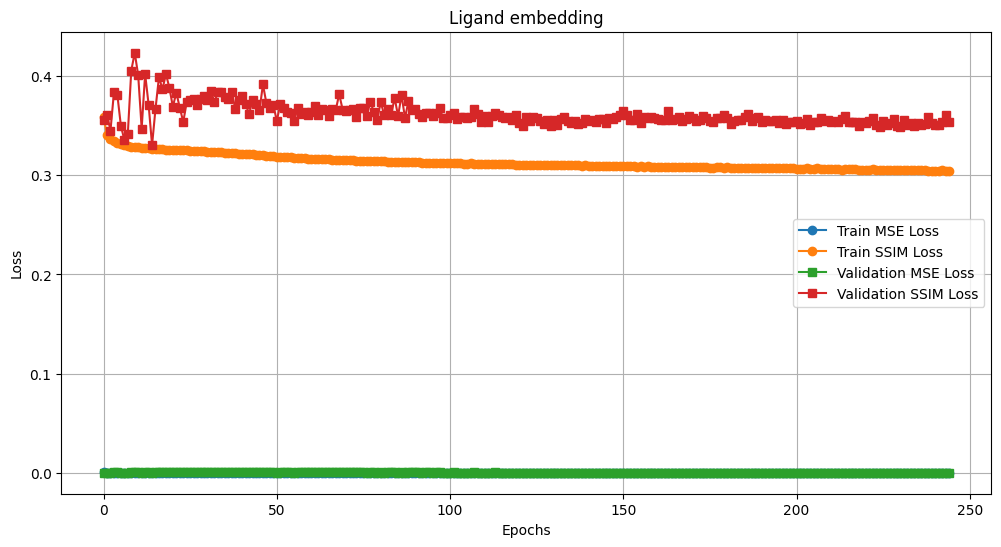

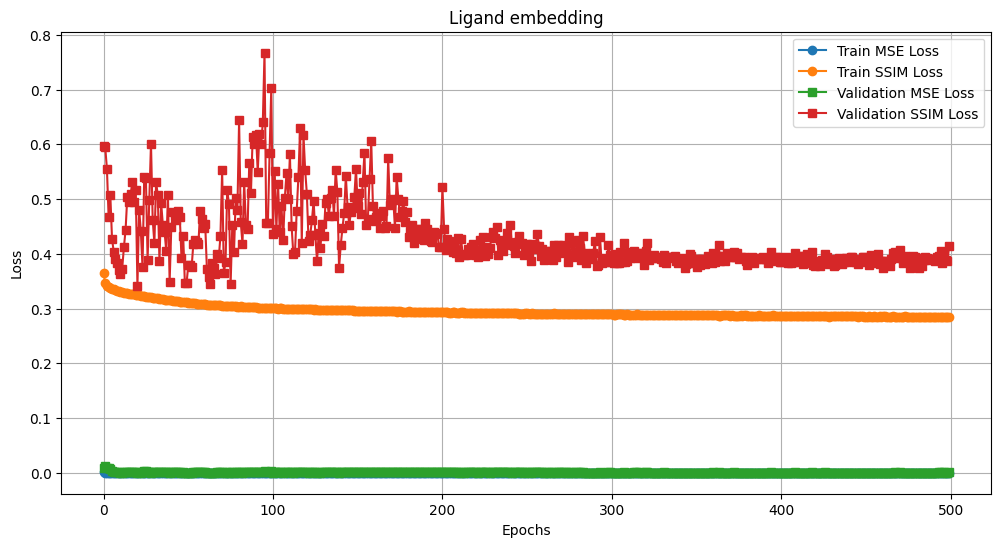

FileNotFoundError: [Errno 2] No such file or directory: '../model_save_folder/K_0_unet_with_embeddings_combined_loss_norm_minmax_maps_forward_model_bad_nconfs3_to_good_res2.0_batchsize_16_lr_5e-4_wd_1e-5_20250116_220903/log/train/Train.log'

In [1]:
import matplotlib.pyplot as plt
import re

# Read the log file
Folders = [
    "k_0_unet_with_embeddings_combined_loss_norm_minmax_maps_forward_model_bad_nconfs3_to_good_res2.0_batchsize_8_lr_5.0e-04_wd_1.0e-04_20250220_133407",
    "k_0_unet_with_embeddings_combined_loss_norm_minmax_maps_forward_model_bad_nconfs3_to_good_res2.0_batchsize_8_lr_5.0e-04_wd_1.0e-04_20250220_133404",
    "k_0_Unet3D_with_Ligand_embeddings_Hybrid_loss_Norm_minmax_maps_Forward_model_bad_nconfs3_to_Good_res2.0_Batchsize_16_lr_5.0e-04_wd_1.0e-04_20250221_112321",
    "K_0_unet_with_embeddings_combined_loss_norm_minmax_maps_forward_model_bad_nconfs3_to_good_res2.0_batchsize_16_lr_5e-4_wd_1e-5_20250116_220903"
]


for i in Folders:


    file_path = f"../model_save_folder/{i}/log/train/Train.log"  # Change this to the actual file path
    with open(file_path, "r") as file:
        lines = file.readlines()
    
    # Initialize lists
    epochs = []
    train_mse_loss, train_ssim_loss = [], []
    val_mse_loss, val_ssim_loss = [], []
    
    # Parse the log file
    for line in lines:
        match = re.search(r"epoch-(\d+), train_mse_loss-([0-9\.]+), train_ssim_loss-([0-9\.]+), val_mse_loss-([0-9\.]+), val_ssim_loss-([0-9\.]+)", line)
        if match:
            epoch = int(match.group(1))
            epochs.append(epoch)
            train_mse_loss.append(float(match.group(2)))
            train_ssim_loss.append(float(match.group(3)))
            val_mse_loss.append(float(match.group(4)))
            val_ssim_loss.append(float(match.group(5)))
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_mse_loss, label="Train MSE Loss", marker="o")
    plt.plot(epochs, train_ssim_loss, label="Train SSIM Loss", marker="o")
    plt.plot(epochs, val_mse_loss, label="Validation MSE Loss", marker="s")
    plt.plot(epochs, val_ssim_loss, label="Validation SSIM Loss", marker="s")
    
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Ligand embedding")
    plt.legend()
    plt.grid(True)
    plt.show()
    